<a href="https://colab.research.google.com/github/nakampany/DeepLearning2022/blob/main/05_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 【余談：読まなくて良い】実はパーセプトロンの出力は(1, 0)でも，
# (1, -1)でも構わない．残差が{-1, 0, 1}なのか，{-2, 0, 2}なのか
# の違いしかないので，学習率で吸収できる．
minu = 0    # ということで(1, 0)を使うか(1, -1)を使うかという変数

# 描画用の関数（内容は理解しなくても良い）
def myplot(w, X, y):
    xd = np.arange(3, 8, 0.01)
    yd = - (w[0] + w[1] * xd) / w[2]
    plt.plot(xd, yd, color="r")
    
    plt.scatter(X[y==minu, 0], X[y==minu, 1], color='red', marker='o', label='setosa')
    plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='x', label='versicolor')
    
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.legend(loc='upper left')
    plt.xlim(3, 8)
    plt.ylim(0, 7)
    plt.text(4.0, 7.5, "{:.2f} + {:.2f}x + {:.2f}y =  0".format(w[0], w[1], w[2]))
    plt.grid()

In [ ]:
import imageio

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10, verbose=True):
        self.eta = eta
        self.n_iter = n_iter
        self.verbose = verbose
        if self.verbose:
            # アニメーション保存用
            plt.cla()
            self.anim = imageio.get_writer('perceptron.gif', mode='I', duration=0.1)
    
    def fit(self, X, y):
        self.w_ = np.random.randn(1+X.shape[1])
        self.errors_ = []
        
        # index
        indices = np.arange(len(X))
        
        # 何回繰り返すか？（Epochと呼ぶ）
        for _ in range(self.n_iter):
            errors = 0
            np.random.shuffle(indices)  # indexの順序をシャッフルする
            for i, idx in enumerate(indices):
                xi, target = X[idx], y[idx]
                # 重みw1,,,,wmの更新
                # Δwj = η(y-y^)xj　の前半η(y-y^)をupdateに，そしてΔwjを計算
                pred = self.predict(xi)
                zansa = (target-pred)
                update = self.eta * zansa
                # ベクトル演算なので一行で書ける
                self.w_[1:] += update * xi
                
                # 重みw0の更新 (xiベクトルにx0=1が含まれていないので)
                self.w_[0] += update * 1
                
                # 重みの更新が０でない場合は誤分類としてカウント
                errors += int(update != 0.0)
                
                # 現状のwを一旦可視化する(5データごとに)
                if self.verbose and (i % 5 == 0):
                    #plot_decision_regions(X, y, classifier=self)
                    myplot(self.w_, X, y)
                    plt.scatter([xi[0]], [xi[1]], color='green', marker='v')
                    plt.text(4.0, 7.2, "zansa={:.1f}, update={:.4f}, x[0]={:.2f}, x[1]={:.2f}".format(zansa, update, xi[0], xi[1]))
                    plt.text(4.0, 7.8, "tgt={:.1f}, pred={:.1f}".format(target, pred))
                    plt.gcf().canvas.draw()
                    img = np.frombuffer(plt.gcf().canvas.tostring_rgb(), dtype=np.uint8)
                    img = img.reshape(plt.gcf().canvas.get_width_height()[::-1] + (3,))
                    self.anim.append_data(img)
                    plt.pause(0.0001)
                    
            # 反復回数ごとの誤差を格納
            self.errors_.append(errors)
                
        return self
    
    def net_input(self, X):
        # 総入力を計算  (y^ = Σwx + w0)
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def predict(self, X):
        # 1ステップ後のクラスラベルを返す
        return np.where(self.net_input(X) >= 0, 1, minu)

In [ ]:
# irisデータセットのロード
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# 100番目までのデータを抽出し，4列目を正解ラベルyに，0, 2列目を特徴量にする．
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', minu, 1)  # setosa=0, versicolor=1
X = df.iloc[0:100, [0,2]].values

print(X.shape, y.shape)
df

(100, 2) (100,)


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


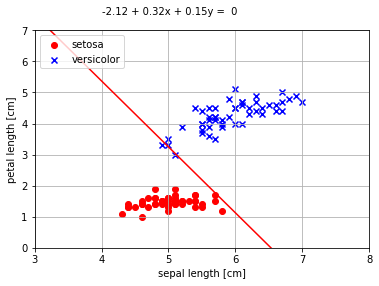

In [ ]:
# 上で作ったPerceptronクラスをインスタンス化する．
ppn = Perceptron(eta = 0.002, n_iter = 20, verbose=False)

# fit()で訓練する．（描画すると少し時間がかかる．）
ppn.fit(X, y)

myplot(ppn.w_, X, y)

In [ ]:
import imageio

def step(x):
    return (x>=0)*1

def linear(x):
    return x

def sigmoid(x):
    return 1/(1+np.exp(-x))

class Adaline(object):
    def __init__(self, eta=0.01, n_iter=10, activate=sigmoid, verbose=True):
        self.eta = eta
        self.n_iter = n_iter
        self.verbose = verbose
        self.activate = activate
        if self.verbose:
            # アニメーション保存用
            plt.cla()
            self.anim = imageio.get_writer('adaline.gif', mode='I', duration=0.1)
    
    def fit(self, X, y, w=None):
        if w is None:
            self.w_ = np.random.randn(1+X.shape[1])
        else:
            self.w_ = w
        self.errors_ = []
        
        # index
        indices = np.arange(len(X))
        
        # 何回繰り返すか？（Epochと呼ぶ）
        for epoch in range(self.n_iter):
            # 全データでΔw = η∑(y-y^)を算出する
            zansa = (y - self.predict(X)).reshape(-1, 1) * self.add_bias(X)
            update = self.eta * np.sum(zansa, axis=0)
            # ベクトル演算なので一行で書ける
            self.w_ += update
            
            # 現状のwを一旦可視化する(5データごとに)
            if self.verbose:
                myplot(self.w_, X, y)
                plt.text(4.0, 7.2, "Epoch={:.0f}".format(epoch))
                plt.gcf().canvas.draw()
                img = np.frombuffer(plt.gcf().canvas.tostring_rgb(), dtype=np.uint8)
                img = img.reshape(plt.gcf().canvas.get_width_height()[::-1] + (3,))
                self.anim.append_data(img)
                plt.pause(0.0001)
                
        return self
    
    def net_input(self, X):
        # 総入力を計算  (y^ = Σwx + w0)
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def predict(self, X):
        # 1ステップ後のクラスラベルを返す
        return self.activate(self.net_input(X))
    
    def add_bias(self, X):
        return np.concatenate([np.ones([len(X), 1]), X], axis=1)

In [ ]:
# irisデータセットのロード
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# 100番目までのデータを抽出し，4列目を正解ラベルyに，0, 2列目を特徴量にする．
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', minu, 1)  # setosa=0, versicolor=1
X = df.iloc[0:100, [0,2]].values

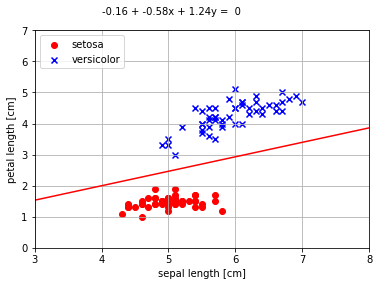

In [ ]:
# 上で作ったPerceptronクラスをインスタンス化する．
adl = Adaline(eta = 0.0005, n_iter = 100, activate=sigmoid, verbose=False)

# fit()で訓練する．（描画すると少し時間がかかる．）
adl.fit(X, y, w=np.array([0.1, 0.1, -0.3]))

myplot(adl.w_, X, y)